# Proyecto Final
Nuestra empresa de video juegos nos solicita crear una aplicación para gestionar los mensajes obtenidos de los
diferentes juegos en diversas redes sociales.

## Construir una interfaz de usuario que permita:

### Realizar la cargar inicial de los datos de los juegos y plataformas, utilizando el fichero metacritic_game_info.csv.

In [1]:
#Importación de librerías y los módulos creados
%matplotlib inline
from cargar_datos import cargar_datos_ddbb as db
from procesar_mensajes import procesar_csv as csv
from procesar_mensajes import procesar_json as js
from procesar_mensajes import procesar_html as ht
from consultas_ddbb import consultas as c

In [2]:
#Establecer conexión a la ddbb
con = db.sql_connection('ddbb/videojuegos.db')

SQlite version: 2.6.0


### Cargar comentarios desde Metacritic

In [ ]:
#Indicamos el nombre del archivo csv
csv_file = 'data/metacritic_game_info.csv'

#Cargamos los datos de videojuegos y plataformas
csv.cargar_videojuegos(con, csv_file)

In [ ]:
#Escogemos un listado de juegos para cargar sus comentarios a la ddbb
lista_juegos_mc = ["God of War III Remastered",
             "Super Mario Galaxy", 
             "Final Fantasy IX",
             "Mario Kart Super Circuit", 
             "Star Wars: Knights of the Old Republic"]

In [ ]:
#Indicamos el archivo csv
csv_file = 'data/metacritic_game_user_comments.csv'
#Cargamos los comentarios
for juego in lista_juegos_mc:
    a = csv.procesar_mensajes(con,csv_file, juego)
    print(a,'\n')

### Cargar juegos y comentarios desde PlayStore

In [3]:
#Escogemos un listado de juegos con sus comentarios para cargar a la ddbb 
lista_juegos_ps =["com.fansipan.stickman.shadow.knights.fightinggames",
                    "com.zitga.cyberfighters.shadow.hunter.legends",
                    "com.unimob.stickman.master.shadow.premium"]

In [4]:
#Indicamos el nombre del archivo json
json_file = 'data/PlayStoreGameAppInfoReview.json'

#Cargamos los comentarios
for juego in lista_juegos_ps:
    a = js.procesar_mensajes(con, json_file, juego)
    print(a,'\n')

Juego com.fansipan.stickman.shadow.knights.fightinggames insertado con id 5001
Se insertaron 642 mensajes del juego "com.fansipan.stickman.shadow.knights.fightinggames" en la base de datos 

Juego com.zitga.cyberfighters.shadow.hunter.legends insertado con id 5002
Se insertaron 104 mensajes del juego "com.zitga.cyberfighters.shadow.hunter.legends" en la base de datos 

Juego com.unimob.stickman.master.shadow.premium insertado con id 5003
Se insertaron 806 mensajes del juego "com.unimob.stickman.master.shadow.premium" en la base de datos 



### Cargar juegos y comentarios desde la web 'Game.es'

In [5]:
#Escogemos un listado de URLs con los juegos que deseamos cargar a la ddbb
lista_url = ['https://www.game.es/VIDEOJUEGOS/SANDBOX/PLAYSTATION-4/GRAND-THEFT-AUTO-THE-TRILOGY-THE-DEFINITIVE-EDITION/196115',
               'https://www.game.es/VIDEOJUEGOS/ACCION/PLAYSTATION-5/MARVELS-GUARDIANS-OF-THE-GALAXY-EDICION-COSMICA-DELUXE/189989',
               'https://www.game.es/VIDEOJUEGOS/ROL/PLAYSTATION-4/ELDEN-RING-LAUNCH-EDITION/169134',
               'https://www.game.es/VIDEOJUEGOS/AVENTURA/NINTENDO-SWITCH/POKEMON-DIAMANTE-BRILLANTE/187759',
               'https://www.game.es/VIDEOJUEGOS/ACCION/XBOX-ONE/MARVELS-AVENGERS/168962',
               'https://www.game.es/VIDEOJUEGOS/AVENTURA/NINTENDO-SWITCH/POKEMON-PERLA-RELUCIENTE/187760',
               'https://www.game.es/VIDEOJUEGOS/AVENTURA/NINTENDO-SWITCH/LEYENDAS-POKEMON-ARCEUS/187763']

In [ ]:
#Cargamos los juegos y sus comentarios
for url in lista_url:
    a = ht.procesar_mensajes_game(con, url)
    print(a,'\n')

### Realizar las siguientes consultas:

#### Dado un rango entre dos fechas y un texto, obtener aquellos usuarios que incluyen en sus mensajes el texto suministrado. Ordena estos usuarios por cantidad de apariciones del texto en distintos mensajes.

In [7]:
#Escogemos dos fechas y una palabra clave para hacer la búsqueda
f1 = '2019-01-15'
f2 = '2022-01-31'
clave = 'game'

In [ ]:
#Realizamos la consulta
datos = c.consultar_comentarios_fecha(con, clave, f1, f2)
datos

#### Mostrar la cantidad de mensajes publicados por usuarios

In [ ]:
datos = c.consultar_comentarios_usuario(con)
datos

#### Dado un rango entre dos fechas, mostrar la media de mensajes diarios generados para cada red social. Mostrar los resultados de esta consulta mediante un histograma.

In [13]:
#Escogemos dos fechas para realizar la búsqueda
f1 = '2019-01-12'
f2 = '2023-09-30'

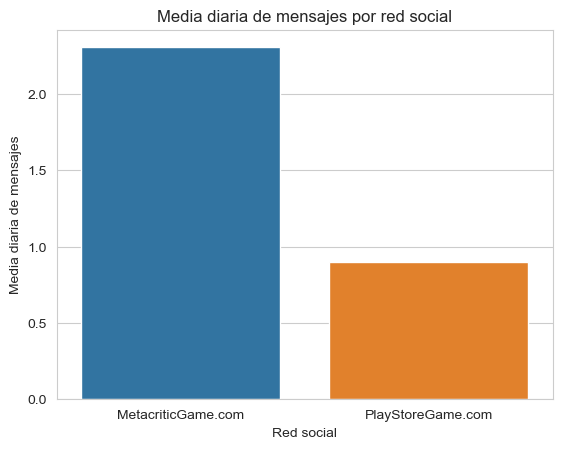

La red social con más mensajes durante este periodo fue MetacriticGame.com con un promedio de 2.31 mensajes por día


In [14]:
#Realizamos la consulta
c.consultar_comentarios_red_social_fecha(con, f1, f2)

#### Obtener una estadística de cuál es la red social dónde más se habla sobre un determinado tema. Dicho tema se definirá por un conjunto de palabras que pueden aparecer en los mensajes

In [15]:
#Escoger tres palabras clave que respresenten el tema de interés a consultar
palabra1 = 'mario'
palabra2 = 'fun'
palabra3 = 'game'

                     count    sum      mean  min   max
nom_red_social                                        
MetacriticGame.com  3865.0  18089  4.680207  0.0  50.0
PlayStoreGame.com   1543.0   1132  0.733636  0.0   6.0 



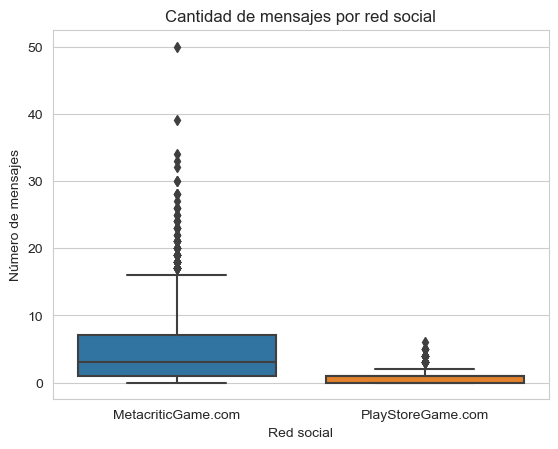

La red social donde más se habla de este tema es MetacriticGame.com



In [16]:
#Realizamos la consulta
c.consultar_tema_red_social(con, palabra1, palabra2, palabra3)